In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import time
import scipy.stats as st

In [4]:
tit1=time.time()
name_cen_nd = 'D:/Vasiliev/PERMAK-A/nv/8d9d/max_cen_m.csv'
table_cen_nd=pd.read_csv(name_cen_nd, sep=',') 
print('files readed in: ',time.time()-tit1)

files readed in:  0.09600567817687988


In [5]:
zeros=table_cen_nd.query('state==0')

In [6]:
itcen_ndb=[]
itcen_ndm=[]
itcen_nde=[]
kk_cen_nd=table_cen_nd.loc[:,'kr']
kko=zeros.loc[:,'kr']
t2=time.time()

for _state in range (1,100):
    vacb_cennd=table_cen_nd.query('state==@_state & time==0')
    vacm_cennd=table_cen_nd.query('state==@_state & time==13')
    vace_cennd=table_cen_nd.query('state==@_state & time==25')
###
    for i in vacb_cennd.index:
         if (vacb_cennd.loc[i,'state']!=50):
            res_cennd=100*(kk_cen_nd[i]-kko[i%120])/kko[i%120]
            itcen_ndb.append(res_cennd)
            
    for i in vacm_cennd.index:
        if (vacm_cennd.loc[i,'state']!=50):
            res_cennd=100*(kk_cen_nd[i]-kko[i%120])/kko[i%120]
            itcen_ndm.append(res_cennd)
            
    for i in vace_cennd.index:
        if (vace_cennd.loc[i,'state']!=50):
            res_cennd=100*(kk_cen_nd[i]-kko[i%120])/kko[i%120]
            itcen_nde.append(res_cennd)
            
            
print(time.time()-t2)

3.816218376159668


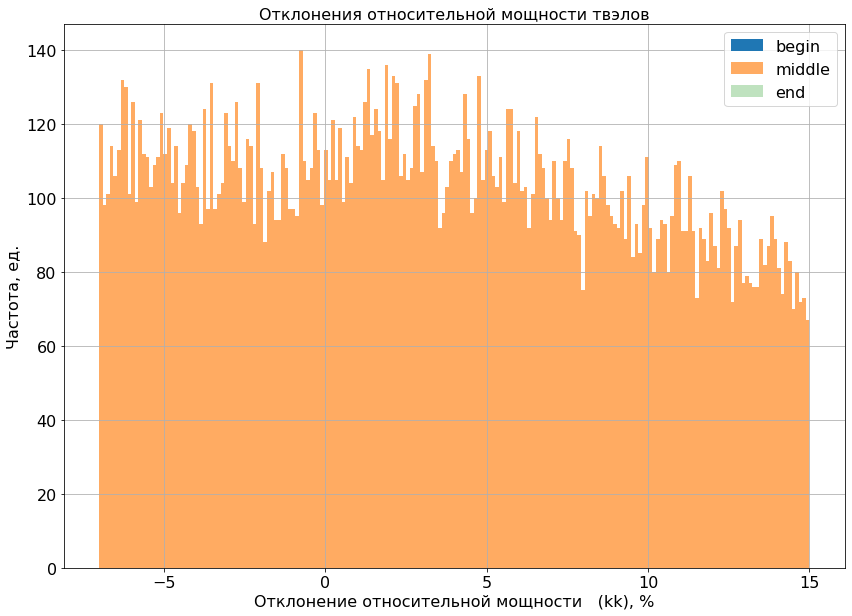

In [7]:
bins=np.linspace(-7,15,200)
plt.figure(figsize=(14,10))
plt.hist(itcen_ndb,bins,label='begin')
plt.hist(itcen_ndm,bins,alpha=0.65,label='middle')
plt.hist(itcen_nde,bins,alpha=0.3,label='end')
plt.title('Отклонения относительной мощности твэлов',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Отклонение относительной мощности   (kk), %', fontsize=16)
plt.ylabel('Частота, ед.', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()


In [16]:
table_cen_nd.query('tvs==93 & tvel==287 & time==13 & state==33')

,tvs,tvel,time,kk,state,kq,kr
32827,93,287,13,0.9234,33,1.08,0.997272
